# 1. JULIA PROGRAMMING TUTORIAL

## 1.1. INDUCTANCE OF COMPOSITE CONDUCTOR LINES INDUCTANCE 

\begin{align}
  L = \frac{\lambda}{I}
\end{align}

where $L$ refers to inductance; $\lambda$ is the linked flux; and $I$ refers to the current through the conductor.

### 1.1.1 Assumptions and considerations
<ol>
  <li> Conductor Y is the return circuit for the current in conductor X</li>
  <li> All the strands of each conductor are identycal cylindrical filaments and carry the same current.</li>
</ol>


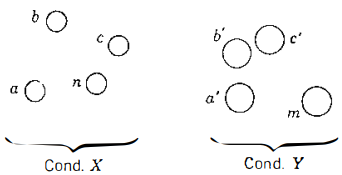



The flux linkages for the filament "a" are:

\begin{align}
  \lambda_{a} = 2 \times 10^{-7} \times I \times ln(\frac{( D_{aa'}D_{ab'}D_{ac'}...D_{am} )^{1/m}}{ (r_{a'}D_{ab}D_{ac}...D_{an})^{1/n} })
\end{align}
where $r_{a'} =  r_{a} \times e^{1/4} \approx 0.7788 \times r_{a}$

Regarding that the curret through filament a is $I_a=I/n$, Consequently the inductance:

\begin{align}
  L_{a} = 2n \times 10^{-7} \times ln(\frac{( D_{aa'}D_{ab'}D_{ac'}...D_{am} )^{1/m}}{ (r_{a'}D_{ab}D_{ac}...D_{an})^{1/n} })
\end{align}

The inductance of conductor "X" can be expressed as:

\begin{align}
  L_{X} = \frac{L_{av}}{n} = \frac{L_a+L_b+L_c+...+L_n}{n^2}
\end{align}

This results in:

\begin{align}
  L_{X} = 2 \times 10^{-7} \times ln( \frac{ [ ( D_{aa'}D_{ab'}D_{ac'}...D_{am} ) ( D_{ba'}D_{bb'}D_{bc'}...D_{bm} )...( D_{na'}D_{nb'}D_{nc'}...D_{nm} ) ]^{1/(mn)} }{ [ (r_{a'}D_{ab}D_{ac}...D_{an})(D_{ba}r_{b'}D_{bc}...D_{bn})...(D_{na}D_{nb}D_{nc}...r_{n'}) ]^{n^2} })
\end{align}

where
\begin{align}
  GMD = [ ( D_{aa'}D_{ab'}D_{ac'}...D_{am} ) ( D_{ba'}D_{bb'}D_{bc'}...D_{bm} )...( D_{na'}D_{nb'}D_{nc'}...D_{nm} ) ]^{1/(mn)} 
\end{align}

\begin{align}
  GMR = [ (r_{a'}D_{ab}D_{ac}...D_{an})(D_{ba}r_{b'}D_{bc}...D_{bn})...(D_{na}D_{nb}D_{nc}...r_{n'}) ]^{n^2} 
\end{align}

Therefore:

\begin{align}
  L_{X} = 2 \times 10^{-7} \times ln(\frac{GMD}{GMR} )
\end{align}

Finally the inductance of the line: 

\begin{align}
  L = L_{X} + L_{Y}
\end{align}


### 1.1.2. CALCULATIONS (Example 4.2 - Stevenson Book - p. 158)

One circuit of a single-phase transmission line is composed of three solid O.2S-cm-radius wires. The return circuit is composed of two O.S-em-radius wires. The arrangement of conductors is shown in Fig. 4.9. 
Find the inductance due to the current in each side of the line and the inductance of the complete line in henrys per meter (and in millihenrys per mile).

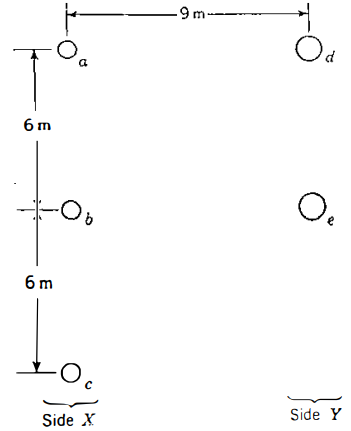

In [39]:
#FUNCTIONS
function get_distance( P1, P2 )
    return sqrt( ( P1[1] - P2[1] )^2 + ( P1[2] - P2[2] )^2 )
end

function get_GMD( X1, Y1, X2, Y2 )
    GMD = 1
    n   = length( X1 )
    m   = length( X2 )
    for i = 1 : n
        for j = 1 : m
            GMD = GMD * get_distance( [ X1[i] Y1[i] ], [ X2[j] Y2[j] ] )
            #print(i , "\t" , j , "\t", GMD, "\n")
        end
    end
    return GMD^( 1 / (n * m) )
end

function get_GMR( X1, Y1, r )
    GMR = 1
    n   = length( X1 )
    for i = 1 : n
        for j = 1 : n
            if i == j 
                GMR = GMR * ( 1 / exp(1/4) ) * r
                continue
            end
            GMR = GMR * get_distance( [ X1[i] Y1[i] ], [ X1[j] Y1[j] ] )
            #print(i , "\t", j , "\t" , GMR, "\n")
        end
    end
    return GMR^( 1 / (n * n) )
end

function get_Lx( GMD, GMR, μ_r=1 )
    μ = 4 * π * 10^(-7) * μ_r
    return μ / ( 2*π ) * log( (GMD)/(GMR) )
end

#Input Data
    #Conductor X - coordinates in [m]
X_1 = [ -4.5 -4.5 -4.5 ]  #Elements separated by "," gives a vector; by space gives a matrix
Y_1 = [ 12.0  6.0  0.0 ] 
r_1 = 0.25 * ( 1/100 )
    #Conductor B
X_2 = [ 4.5  4.5 ]
Y_2 = [ 12.0 6.0 ]
r_2 = 0.5 * ( 1/100 )

#Calculations
n   = length(X_1)
m   = length(X_2)
m_n = m * n

GMD   = get_GMD( X_1, Y_1, X_2, Y_2 )
GMR_1 = get_GMR( X_1, Y_1, r_1 )
GMR_2 = get_GMR( X_2, Y_2, r_2 )

L_1   = get_Lx( GMD, GMR_1 , 1 )
L_2   = get_Lx( GMD, GMR_2 , 1 )
L = L_1 + L_2

1.4717629728153221e-6